<a href="https://colab.research.google.com/github/BrianChegeGichau/Titanicdataset/blob/master/SpamDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the Context

We have been provided with variables which help us determine if a message is a spam or ham. They are all continuous variables making it a Gaussian Naive Bayes Classifier problem. We will understand the variables nature and perform appropriate transformation techniques on the data.

# Specifying the Question

Am tasked to study the factors and come up with a model that will best classify the data at hand. 

Get the factors that determine if a message is a spam or not.

# Metrics of success

I am targeting to achieving an accuracy of 85% with the optimal Naive Bayes Classifier model.

# The experimental design

The following steps will be undertaken during this study:

Reading and exploring the dataset.

*   Data Cleaning; Dealing with missing data to answer the given question.
*   Perform univariate and multi-variate analysis and recording observations.
*   Fitting my data into the Naive Bayes Classifier and obtaining the best paramters for the model.
*   Providing comprehensive recommendations based on my study.
*   Challenging my solution by providing insights on how to make model improvements.


# 2. Reading and exploring the dataset

In [1]:
#Importing the necessary libraries to read the data
import pandas as pd
import numpy as np

In [2]:
#Reading and previewing the top few rows of the dataset
df = pd.read_csv('spambase_csv.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
#Previewing the few last rows of the dataset
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [4]:
#Exploring the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

All the variables in our dataset are in their correct format save for the class which should be an category.

In [5]:
#Finding the basic statistics of the dataset
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [6]:
print('The dataset has ', df.shape[1], 'columns and ', df.shape[0], 'rows.')

The dataset has  58 columns and  4601 rows.


# 3. Cleaning the Dataset

In [7]:
#Finding whether there are any null vales in the dataset
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The dataset does not have any missing values.

In [8]:
#Checking for duplicates in teh data
print('Are there any duplicates: ',df.duplicated().any())

Are there any duplicates:  True


In [9]:
#Confirming the presence of duplicates
df = df.drop_duplicates()
print('Is there still any duplicates ? ', df.duplicated().any())

Is there still any duplicates ?  False


In [ ]:
#Randomly selecting the columns for checking the outliers and distribution
#I chose a random sample of 6 since we have 58 columns and a 10% of it will well represent the population
random_columns = df.sample(6,axis=1)

In [ ]:
#Previewing the randomly selected columns.
random_columns.head()

,word_freq_people,word_freq_85,word_freq_receive,word_freq_857,word_freq_direct,char_freq_%5B
0,0.00,0.0,0.00,0.0,0.00,0.0
1,0.65,0.0,0.21,0.0,0.00,0.0
2,0.12,0.0,0.38,0.0,0.06,0.0
3,0.31,0.0,0.31,0.0,0.00,0.0
4,0.31,0.0,0.31,0.0,0.00,0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


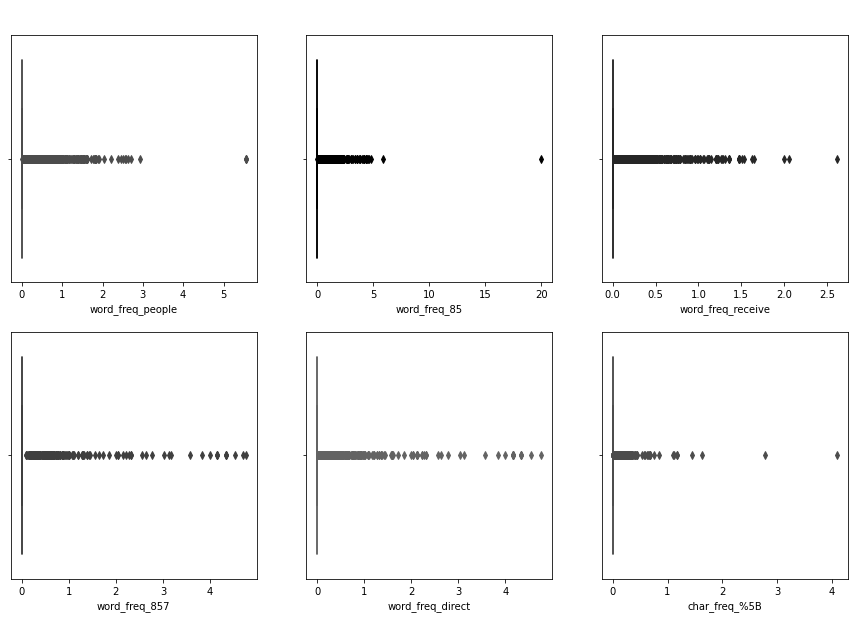

In [ ]:
 #Checking for outliers
#Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Defining the columns to check for outliers.
cols = random_columns.columns
#Defining the colors to be used in the boxplots
colors = ['red','black','green','darkturquoise','mediumpurple','darkorange','fuchsia','blueviolet']
#Used a for loop to plot boxplots for each of the selected columns.
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')

There a few outliers in the randomly chosen columns. But I will not be dropping them since they don't seem to be many. And probably captures the amount of variations that are in a spam message.

# Data Exploration

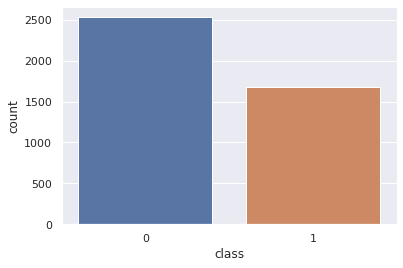

In [ ]:
#Visualzing the ham and spam messages in our dataset
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=df)

Our dataset is a bit imbalanced. The number of ham messages are more than the spam messages.

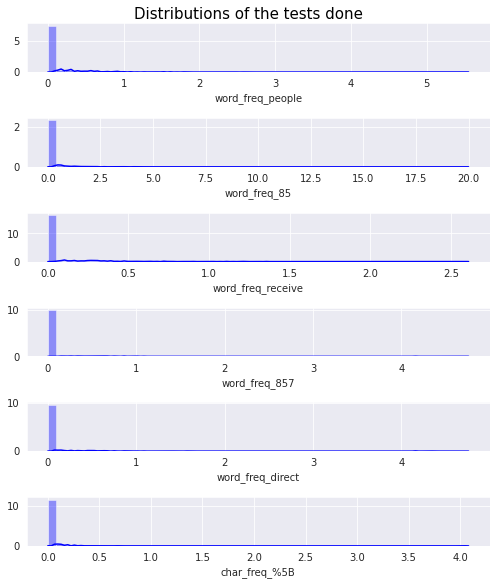

In [ ]:
#Checking the distribution of the data
columns = random_columns.columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of the tests done', y= 1.01, color = 'black', fontsize = 15)
#Using a for loop to plot the distributions of the selected columns
for ax, data, col in zip(axes.flatten(), df, columns):
  sns.distplot(df[col], ax = ax, kde = True, color = 'blue')
plt.tight_layout()

Our data since to have a unimodal kind of distribution. We will need to scale the data for more accurate findings.

# Baseline Model.

In [ ]:
#Defining the predictor variables and target variables in our dataset.
X = df.drop(['class'],axis=1)
y = df['class']
#One hot encoding our data for the categorical variables
#X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
#Importing the Logistic Regression and the StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Fitting the data in a logistic regression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
#Predicting classification using the test set
y_predict = regressor.predict(X_test)
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[465  30]
 [ 48 299]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       495
           1       0.91      0.86      0.88       347

    accuracy                           0.91       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.91      0.91       842



Our baseline Logistic Regression model achieved an accuracy of 91%. And an f1 score of 93%.

# Multivariate analysis

In [ ]:
# applying Linear Discriminant Analysis
# importing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False).head(10)

,0
word_freq_remove,0.818307
char_freq_%21,0.724394
word_freq_your,0.613577
word_freq_free,0.597491
word_freq_000,0.583794
word_freq_our,0.569563
char_freq_%24,0.549579
capital_run_length_total,0.462565
word_freq_font,0.458953
word_freq_internet,0.331330


This are the factors that affect more:
*  word_freq_remove	
*  char_freq_%21	
*  word_freq_your	
*  word_freq_free	
*  word_freq_000	
*  word_freq_our	
*  char_freq_%24	
*  capital_run_length_total	
*  word_freq_font	
*  word_freq_internet

# Naive Bayes Classifier

It is simple technique for constructing classifiers:models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some infinite.

Naive Bayes classifier assume that the effect of the value of a predictor (x) on a given class (c) is independent of the values of other predictors. This assumption is called class conditional independence. P(c|x) is the posterior probability of class (target) given predictor (attribute).

Gaussian Naive Bayes Classifier

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [ ]:
#Defining the target and predictor variables.
X = df.drop(['class'],axis=1)
y = df['class']
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.2)
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[389 129]
 [ 10 314]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       518
           1       0.71      0.97      0.82       324

    accuracy                           0.83       842
   macro avg       0.84      0.86      0.83       842
weighted avg       0.87      0.83      0.84       842



Our Gaussian Model has an accuracy of 83% which is generally a good fit but does no achieve our metric of success.

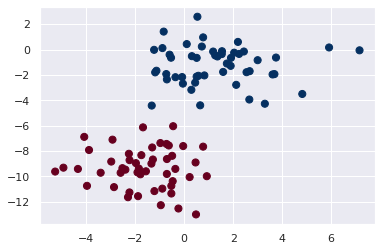

In [ ]:
#Plotting data points of the target variables and predictor variables
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

The target and predictor variables can clearly be separated.

In [ ]:
#Defining the list of test sizes we will use for the assessment
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
#Importing necessary libraries for the assessment
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#Uing a for loop to split the dataset fit it with the optimal parameters then assess using the accuracy score.
for test in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 12)
    
    # fitting to classifier
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # making predictions
    y_pred = classifier.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), metrics.accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.833729216152019
Test size 0.2 has accuracy score: 0.8420427553444181
Test size 0.3 has accuracy score: 0.833729216152019
Test size 0.4 has accuracy score: 0.834916864608076
Test size 0.5 has accuracy score: 0.833729216152019


The best test size for the model is a 20% test size which achieved an accuracy of 84%

I decided to use feature reduction using the Linear Discriminant Analysis using a single discriminant component to find out whether the performance of our model will improve.

In [ ]:
#Defining the predictor and target variables
X = df.drop(['class'],axis=1)
y = df['class']

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.1)
#Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler
#Scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Reduction technique using LDA which robustly improves the performance of the Naive Bayes
#Using one principal component
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#Importing the Gaussian Naive BayesClassifier
from sklearn.naive_bayes import GaussianNB
#Fitting the data into our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)
#Predicting using the test values
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#Printing out the various metrics
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[254  11]
 [ 25 131]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       265
           1       0.92      0.84      0.88       156

    accuracy                           0.91       421
   macro avg       0.92      0.90      0.91       421
weighted avg       0.91      0.91      0.91       421



The accuracy of our stadardized and using a single discriminant analysis is 91%. This surpasses our metric of success and we can confidently state that we can 91% correctly classify a spam message.

In [ ]:
#Defining the list of test sizes we will use for the assessment
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
#Importing necessary libraries for the assessment
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#Uing a for loop to split the dataset fit it with the optimal parameters then assess using the accuracy score.
for test in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 12)
    #Standardizing the predictor variables
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    #Using a since discriminat component
    lda = LDA(n_components = 1)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # fitting to classifier
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # making predictions
    y_pred = classifier.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), metrics.accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.9144893111638955
Test size 0.2 has accuracy score: 0.9133016627078385
Test size 0.3 has accuracy score: 0.9081551860649247
Test size 0.4 has accuracy score: 0.9055819477434679
Test size 0.5 has accuracy score: 0.8983372921615201


The optimal model achives 91% accuracy with a test size of 10%.

# Challenging the Solution.

I will be challenging my solution with the XGBoost Algorithm which is focused on computational speed and model perfromance which proved quite troublsome where the computational power was really expensive.

There are three main forms of gradient boosting which are supported:-

*  Gradient Boosting Algorithm also called the gradient boosting machine.
*  Stochastic Gradient Boosting with sub-sampling at the column per split level.
*  Regularized Gradient Boosting with L1 and L2 regularization.

In [ ]:
#importing xgboost
import xgboost as xgb
#Defining the regression of our classifer to linear
xgb_model = xgb.XGBClassifier(objective='reg:linear',random_state=42)

In [ ]:
#Defining the predictor and target variables
X = df.drop(['class'],axis=1)
y = df['class']
#Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#Fitting the data into our model
xgb_model.fit(X_train,y_train)

[12:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Predict the data using the test set
y_predict = xgb_model.predict(X_test)

In [ ]:
#Printing out the various metrics
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[711  29]
 [ 64 459]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       740
           1       0.94      0.88      0.91       523

    accuracy                           0.93      1263
   macro avg       0.93      0.92      0.92      1263
weighted avg       0.93      0.93      0.93      1263



Our XGBoost model has an accuracy of 93% which makes it the highest we have attained in our analysis. It has critiqued our earlier Naive Bayes Classifer.